# Dataset

In [172]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


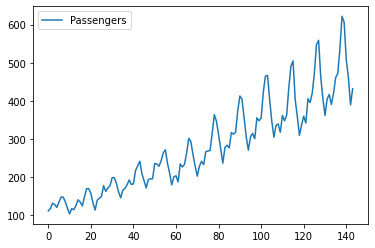

In [173]:
import matplotlib.pyplot as plt

data.plot()

# Statistical Approach

## Simple Moving Average

In [19]:
# Simple Moving Average
df_sma = data.copy()
df_sma['6-month-SMA'] = data['Passengers'].rolling(window=6).mean()
df_sma['12-month-SMA'] = data['Passengers'].rolling(window=12).mean()
df_sma.head(20)

,Month,Passengers,6-month-SMA,12-month-SMA
0,1949-01,112,NaN,NaN
1,1949-02,118,NaN,NaN
2,1949-03,132,NaN,NaN
3,1949-04,129,NaN,NaN
4,1949-05,121,NaN,NaN
5,1949-06,135,124.500000,NaN
6,1949-07,148,130.500000,NaN
7,1949-08,148,135.500000,NaN
8,1949-09,136,136.166667,NaN
9,1949-10,119,134.500000,NaN


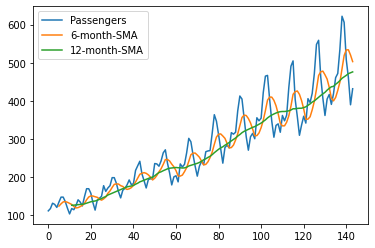

In [20]:
df_sma.plot()

## Exponential Smoothing

In [176]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df_ses = data.copy()

model_ses = SimpleExpSmoothing(data['Passengers'])
fitted_model_ses = model_ses.fit(smoothing_level=0.3,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES'] = fitted_model_ses.fittedvalues

df_ses.head(20)

,Month,Passengers,SES
0,1949-01,112,112.000000
1,1949-02,118,112.000000
2,1949-03,132,113.800000
3,1949-04,129,119.260000
4,1949-05,121,122.182000
5,1949-06,135,121.827400
6,1949-07,148,125.779180
7,1949-08,148,132.445426
8,1949-09,136,137.111798
9,1949-10,119,136.778259


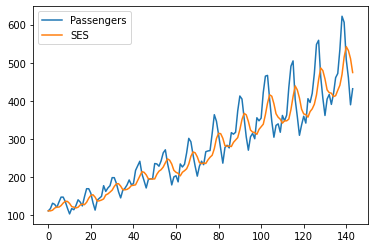

In [177]:
df_ses.plot()

In [40]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_es = data.copy()

model = ExponentialSmoothing(data['Passengers'], trend = 'add') # try mul
fitted_model = model.fit()
df_es['ES'] = fitted_model.fittedvalues.shift(-1)

df_es.head(20)

,Month,Passengers,ES
0,1949-01,112,114.336233
1,1949-02,118,120.336233
2,1949-03,132,134.336233
3,1949-04,129,131.336233
4,1949-05,121,123.336233
5,1949-06,135,137.336233
6,1949-07,148,150.336233
7,1949-08,148,150.336233
8,1949-09,136,138.336233
9,1949-10,119,121.336233


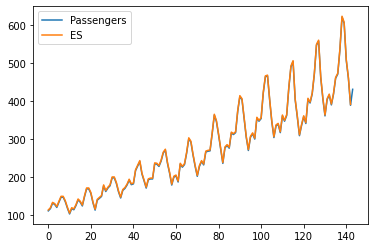

In [25]:
df_es.plot()

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates = ['Month'], index_col = ['Month'])
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [180]:
train_data = df.iloc[:109] # df.loc[:'1940-01-01']
test_data = df.iloc[108:]

In [181]:
fitted_model = ExponentialSmoothing(train_data['Passengers'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [186]:
test_predictions = fitted_model.forecast(48)

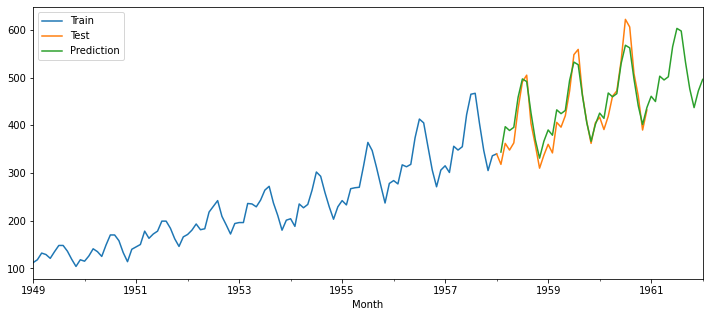

In [187]:
train_data['Passengers'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_data['Passengers'].plot(legend=True, label = 'Test')
test_predictions.plot(legend=True, label = 'Prediction')

In [54]:
# performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print("Exponential Smoothing")
print("MAE: ",mean_absolute_error(test_data['Passengers'],test_predictions[:36]))
print("MSE: ",mean_squared_error(test_data['Passengers'],test_predictions[:36]))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['Passengers'],test_predictions[:36])))
print("R2: ",r2_score(test_data['Passengers'],test_predictions[:36]))
print("")

Exponential Smoothing
MAE:  47.969758184957804
MSE:  3085.1524282060336
RMSE:  55.54414846053573
R2:  0.49575051455142716



## ARIMA

In [152]:
train=df.iloc[:109]
test=df.iloc[108:]

train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [155]:
start=len(train)
end=len(train)+len(test)-1

In [153]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Passengers'],order=(1,1,1)) # (p -> AR, d -> I (stationarity) , q -> MA)
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [156]:
# predictions
predictions=results.predict(start,end,typ='levels').rename('ARIMA(1,1,1) Predictions')

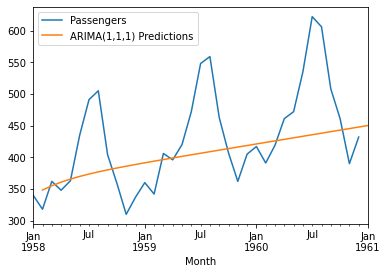

In [158]:
test['Passengers'].plot(legend=True)
predictions.plot(legend=True)

In [160]:
print("ARIMA")
print("MAE: ",mean_absolute_error(test['Passengers'],predictions))
print("MSE: ",mean_squared_error(test['Passengers'],predictions))
print("RMSE: ", np.sqrt(mean_squared_error(test['Passengers'],predictions)))
print("R2: ",r2_score(test['Passengers'],predictions))
print("")

ARIMA
MAE:  52.165825350768834
MSE:  5094.9487523497855
RMSE:  71.37890971673485
R2:  0.16726147360792387



In [162]:
# Forecast into future
model=ARIMA(df['Passengers'],order=(1,1,1))
results=model.fit()
fcast=results.predict(start=len(df),end=len(df)+36,typ='levels').rename('ARIMA(1,1,1) forecast')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


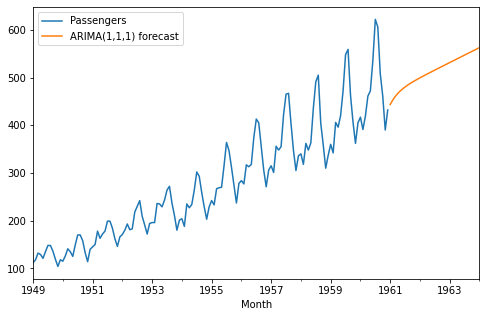

In [163]:
df['Passengers'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [165]:
model=SARIMAX(train['Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [166]:
predictions1=results.predict(start,end,typ='levels').rename('SARIMA Predictions')

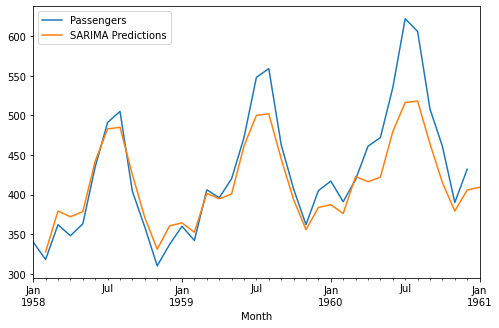

In [167]:
test['Passengers'].plot(legend=True,figsize=(8,5))
predictions1.plot(legend=True)

In [188]:
print("SARIMAX")
print("MAE: ",mean_absolute_error(test['Passengers'],predictions1))
print("MSE: ",mean_squared_error(test['Passengers'],predictions1))
print("RMSE: ", np.sqrt(mean_squared_error(test['Passengers'],predictions1)))
print("R2: ",r2_score(test['Passengers'],predictions1))
print("")

SARIMAX
MAE:  42.74066203439114
MSE:  2953.967294899328
RMSE:  54.35041209502765
R2:  0.5171919303348521



In [169]:
model=SARIMAX(df['Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
fcast=results.predict(start=len(df),end=len(df)+36,typ='levels').rename('SARIMA Forecast')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


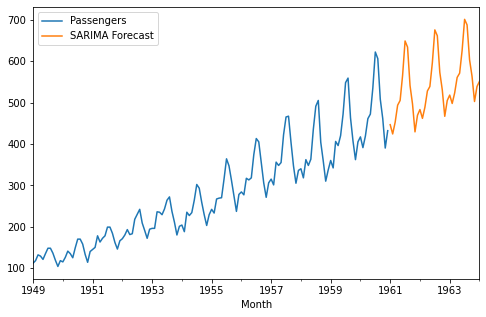

In [170]:
df['Passengers'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

# Machine Learning Approach

## Basic model

In [46]:
df_ml = data.copy()
df_ml.drop(['Month'], axis=1, inplace=True)
df_ml.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [41]:
#lagged Function, just copas from 
#https://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [91]:
lag1 = LaggedFeatures(df_ml,lag=3,fillna=True, dropna=True)
lag1.shape

(141, 4)

In [92]:
train = lag1.iloc[:101]
test = lag1.iloc[101:]
train

,Passengers,Passengers_lag1,Passengers_lag2,Passengers_lag3
3,129,132.0,118.0,112.0
4,121,129.0,132.0,118.0
5,135,121.0,129.0,132.0
6,148,135.0,121.0,129.0
7,148,148.0,135.0,121.0
...,...,...,...,...
99,348,356.0,301.0,315.0
100,355,348.0,356.0,301.0
101,422,355.0,348.0,356.0
102,465,422.0,355.0,348.0


In [93]:
#create X and y

X_train = train.drop(['Passengers'], axis=1)
X_test = test.drop(['Passengers'], axis=1)

y_train = train['Passengers']
y_test = test ['Passengers']


X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [94]:
# call model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

rf = RandomForestRegressor()
lr = LinearRegression()

#train
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
# performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)


print("Random Forest Regression")
print("MAE: ",mean_absolute_error(y_test,y_pred_rf))
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2: ",r2_score(y_test,y_pred_rf))
print("")

print("Linear Regression")
print("MAE: ",mean_absolute_error(y_test,y_pred_lr))
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2: ",r2_score(y_test,y_pred_lr))
print("")


Random Forest Regression
MAE:  47.229
MSE:  3778.062905
RMSE:  61.465949150728974
R2:  0.39239388801529773

Linear Regression
MAE:  39.499299468627996
MSE:  2102.1685847764215
RMSE:  45.84941204395561
R2:  0.6619192129273491



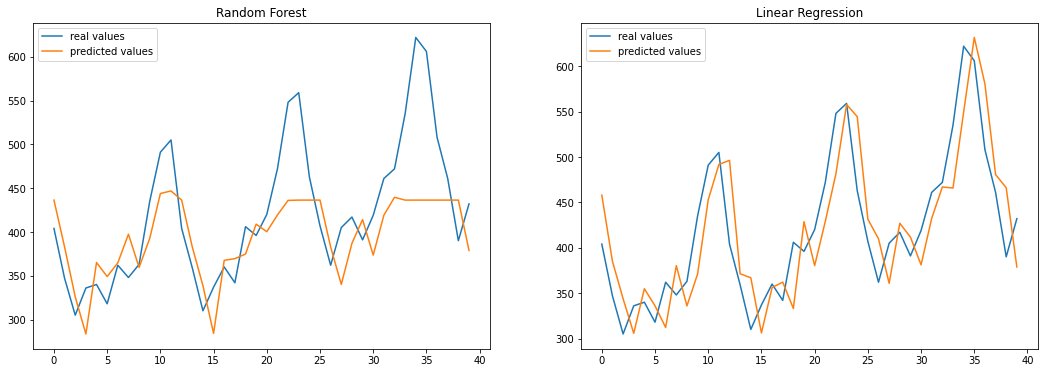

In [113]:
#Plot untuk melihat hasil
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18,6)) 

axs[0].plot(y_test,label='real values')
axs[0].plot(y_pred_rf,label='predicted values')
axs[0].set_title("Random Forest")
axs[0].legend()

axs[1].plot(y_test,label='real values')
axs[1].plot(y_pred_lr,label='predicted values')
axs[1].set_title("Linear Regression")
axs[1].legend()

## LSTM

In [116]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from pandas.tseries.offsets import DateOffset
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [136]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [115]:
train_df = df[:len(df)-12]
test_df = df[len(df)-12:]

In [118]:
scaler = MinMaxScaler()
scaler.fit(train_df)
train = scaler.transform(train_df)
test = scaler.transform(test_df)

In [137]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [138]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=90, verbose= 0)
model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [139]:
pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [140]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=['Prediction'])
df_test = pd.concat([df,df_predict], axis=1)

In [141]:
df_test.tail(15)

,Passengers,Prediction
Month,,
1959-10-01,407,NaN
1959-11-01,362,NaN
1959-12-01,405,NaN
1960-01-01,417,396.180765
1960-02-01,391,403.753162
1960-03-01,419,438.165820
1960-04-01,461,447.189468
1960-05-01,472,489.367644
1960-06-01,535,572.168605


In [150]:
print("LSTM")
print("MAE: ",mean_absolute_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("MSE: ",mean_squared_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("RMSE: ", np.sqrt(mean_squared_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1])))
print("R2: ",r2_score(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("")

LSTM
MAE:  20.438911015788722
MSE:  543.6580352516993
RMSE:  23.316475618148196
R2:  0.9018574309171994



No handles with labels found to put in legend.


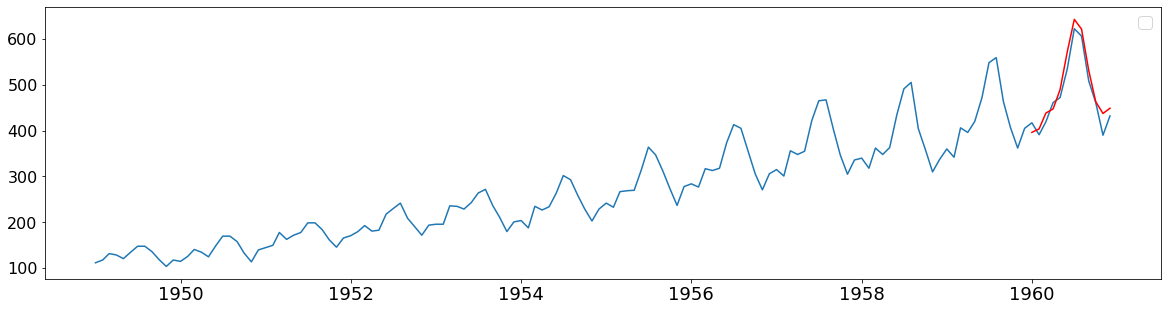

In [151]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Passengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()